# Visualización con Seaborn

## Gráficas de relación (línea y dispersión)

```seabron``` es una librería de Python que, al igual que ```matplotlib``` nos permite realizar gráficas para visualizar nuestros datos. En particular, ```seaborn``` presenta tres tipos de gráficas:
* Relacional
* Distribuciones
* Categórica

Es importante resaltar que ```seaborn``` es una especialziación de ```matplotlib```, razón por la cual al momento de utilizar dicha librería, dependemos no solo de su módulo en sí, sino también de ```matplotlib```, de allí que en el *import* se deben importar ambos. Además, cualquier cambio que haga en el lienzo usando ```matplotlib``` afectará al lienzo de ```seaborn```.

![seaborn1](./seaborn1.png)

En este notebook en particular, veremos ejemplos de gráficos de tipo relacionales, que presentan dos tipos de gráficos posibles: de línea y dispersión.

Tomaremos un caso de análisis de la población de 3 especies de pingüinos cuyos datos, en cada observación, representarán la especie, la isla, la longitud del pico, la profundidad del pico, la longitud de la aleta, la masa y el sexo. Esto forma parte de los datos de muestra y prueba con los que ```seaborn``` cuenta por defecto.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
pinguinos = sns.load_dataset('penguins') # nos devuelve un dataframe
pinguinos.columns = ["especie", "isla", "longitud_pico", "profundidad_pico", "longitud_aleta", "masa", "sexo"]
pinguinos.head()

,especie,isla,longitud_pico,profundidad_pico,longitud_aleta,masa,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Primera gráfica con Seaborn

* Estilos: white, dark, whitegrid, darkgrid, ticks
* Contextos: paper, notebook, talk, poster

Tenemos dos tipos de datos en nuestro dataset:
* Datos numéricos
* Datos categóricos (datos de clasificación, como es el caso de clasificación en especies o en sexo)

Si hacemos una gráfica usando ```seaborn``` simplemente pasándole como único parámetro el dataframe, graficará los datos numéricos.

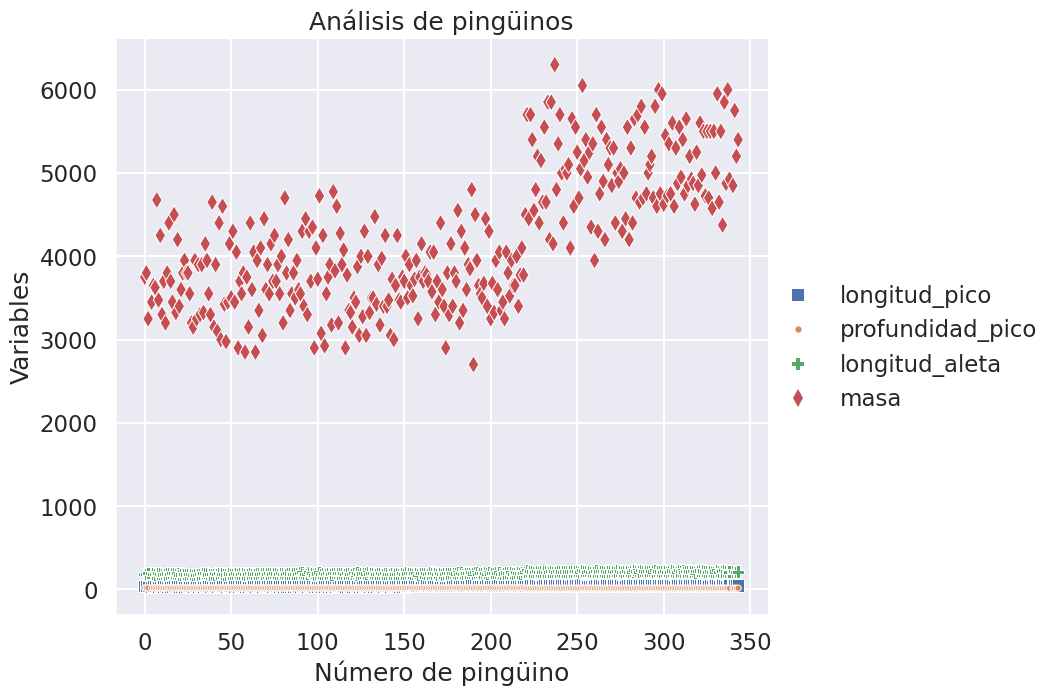

In [4]:
sns.set_theme(style="darkgrid", context="talk") # estilo y contexto general

relacional = sns.relplot(data=pinguinos,
                         height=7,
                         aspect=1.2,
                         markers=["s", ".", "P", "d"]) # ploteo de relacion
relacional.set(title="Análisis de pingüinos")
relacional.set_ylabels("Variables")
relacional.set_xlabels("Número de pingüino")

#plt.grid(False)
plt.show()

### Gráfica de dispersión

Por defecto, los relplot de ```seaborn``` genera una gráfica de dispersión, o lo que se conoce como scatterplot, visto en ```matplotlib```.

>>>>>>>>>>>>>>>>>>> SIMPLE


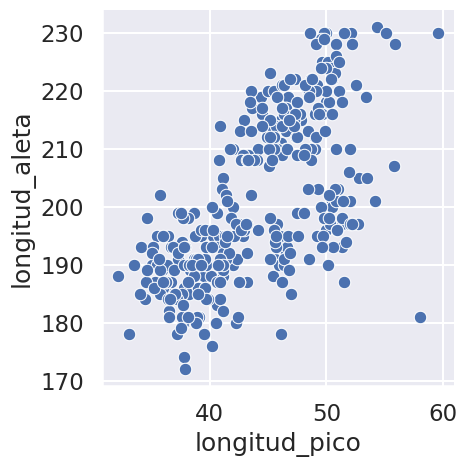

In [5]:
print(">>>>>>>>>>>>>>>>>>> SIMPLE")

sns.relplot(data=pinguinos,
            x="longitud_pico",
            y="longitud_aleta")

>>>>>>>>>>>>>>>>>>> MATIZ Y TAMAÑO FIJO


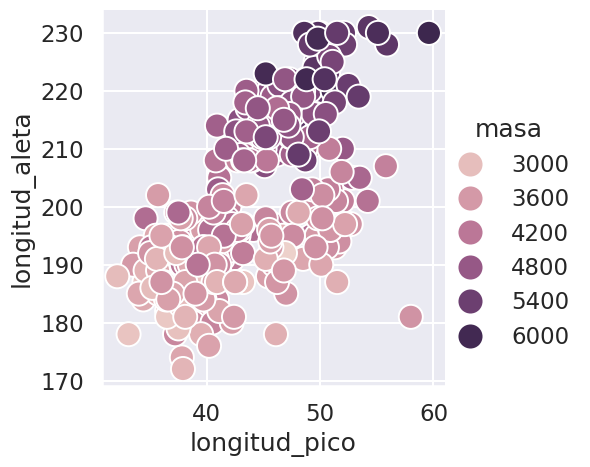

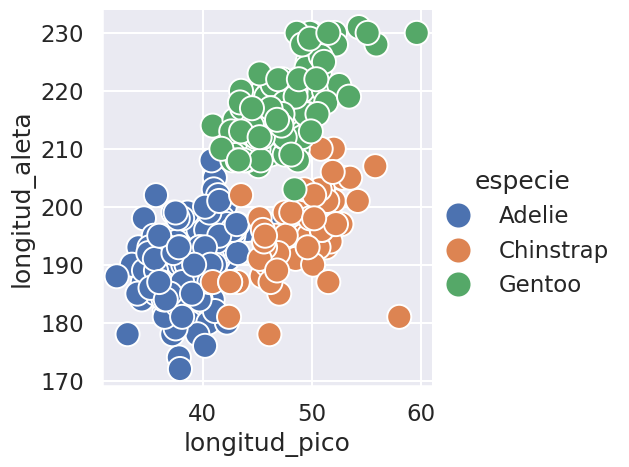

In [6]:
print(">>>>>>>>>>>>>>>>>>> MATIZ Y TAMAÑO FIJO")

sns.relplot(data=pinguinos,
            x="longitud_pico",
            y="longitud_aleta",
            hue="masa", # hue indica en base a que ira cambiando el matiz o color
            s=300)

sns.relplot(data=pinguinos,
            x="longitud_pico",
            y="longitud_aleta",
            hue="especie", # hue indice en base a que ira cambiando el matiz o color
            s=300)

>>>>>>>>>>>>>>>>>>> REJILLA, TAMAÑO PERSONALIZADO Y ESTILO


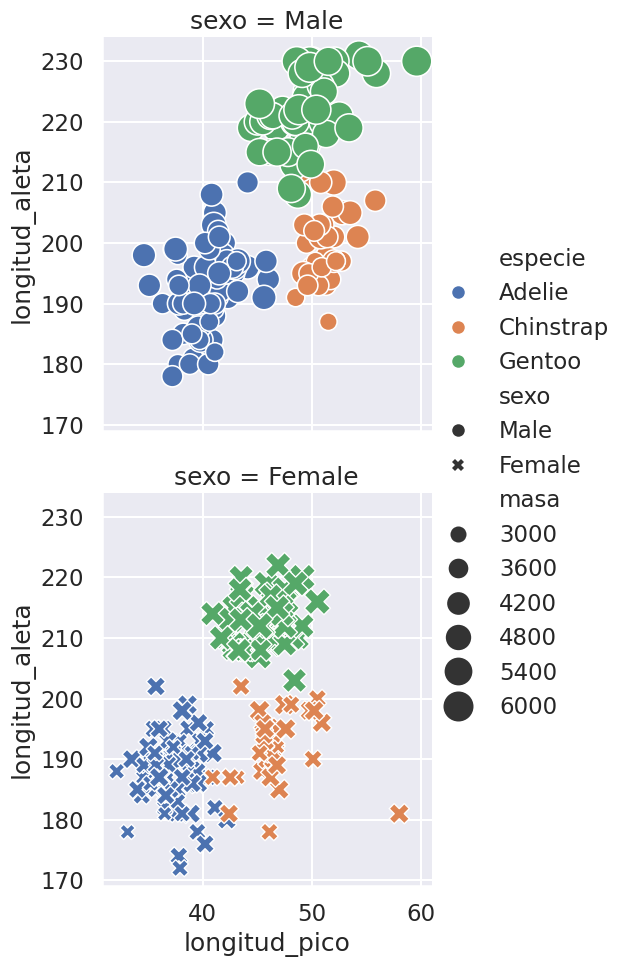

In [7]:
print(">>>>>>>>>>>>>>>>>>> REJILLA, TAMAÑO PERSONALIZADO Y ESTILO")

sns.relplot(data=pinguinos,
            x="longitud_pico",
            y="longitud_aleta",
            hue="especie", # matiz/color cambia en funcion de la especie
            row="sexo",
            size="masa",
            sizes=(100, 500),
            style="sexo")

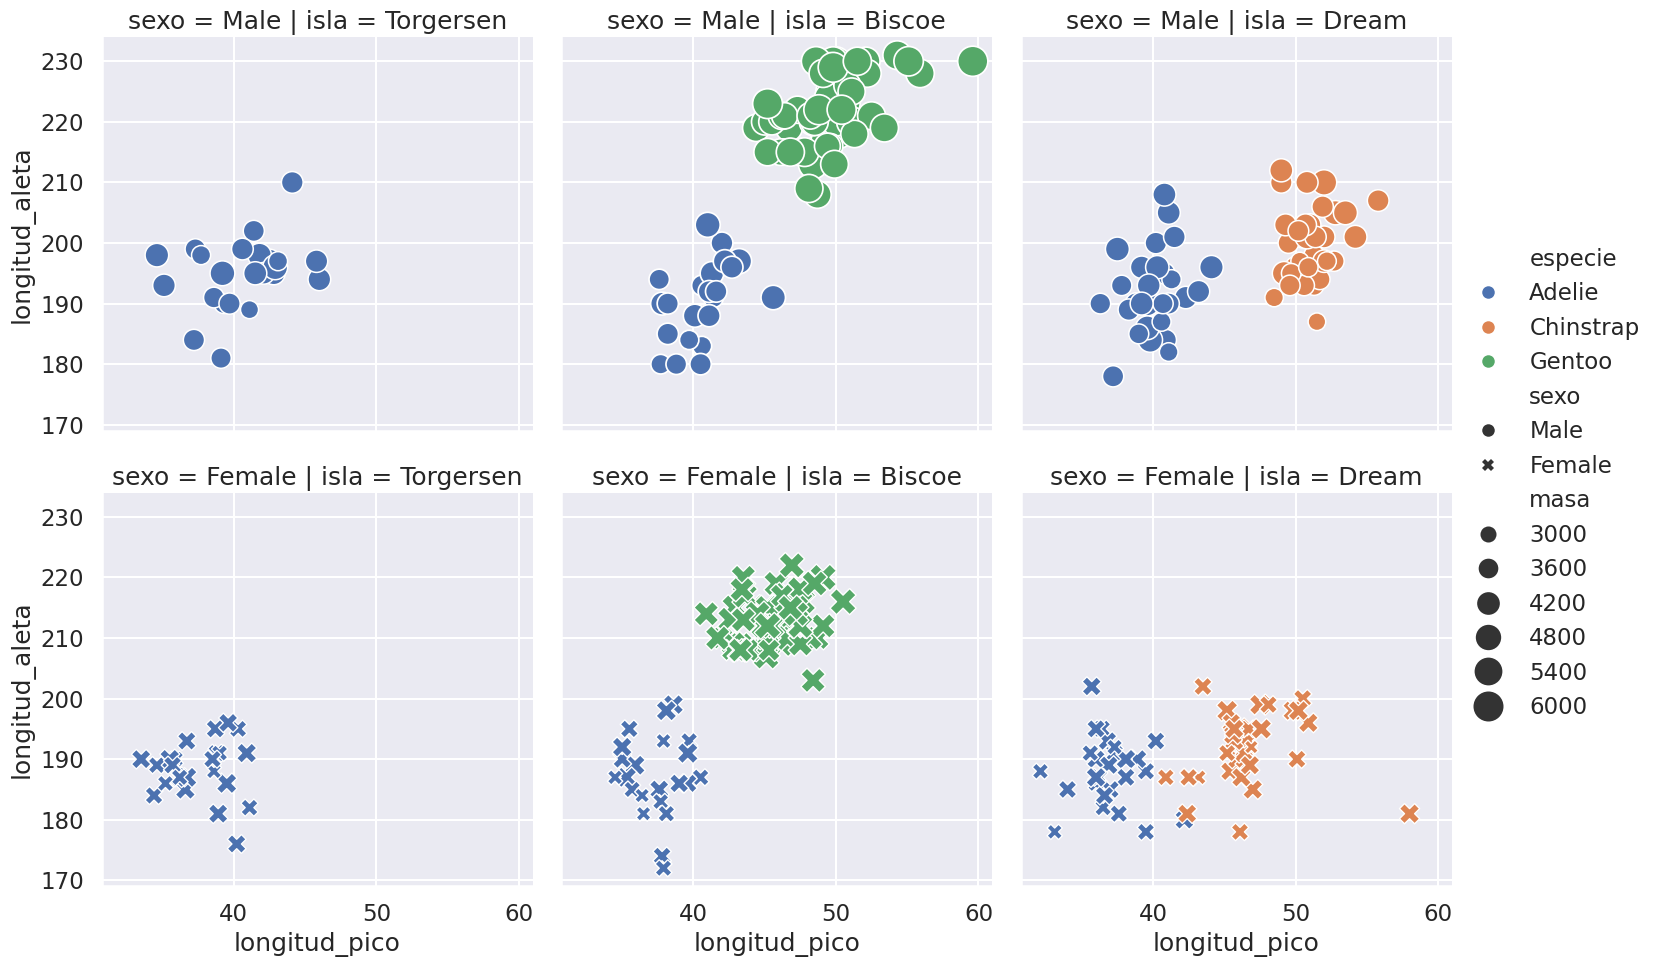

In [8]:
sns.relplot(data=pinguinos,
            x="longitud_pico",
            y="longitud_aleta",
            hue="especie",
            row="sexo",
            col="isla",
            size="masa",
            sizes=(100, 500),
            style="sexo")

### Gráficos de líneas

Los gráficos de línea en ```seaborn``` presentan la característica de mostrar, además, por defecto el intervalo de confianza. Visualmente, es una especie de sombra que se encuentra rodeando cada línea, y representa el porcentaje de tener x% de confianza de que cualquier nueva prueba que se realice con los valores, llegaría a un resultado que ronde el mostrado. También podemos ver la desviación estándar.

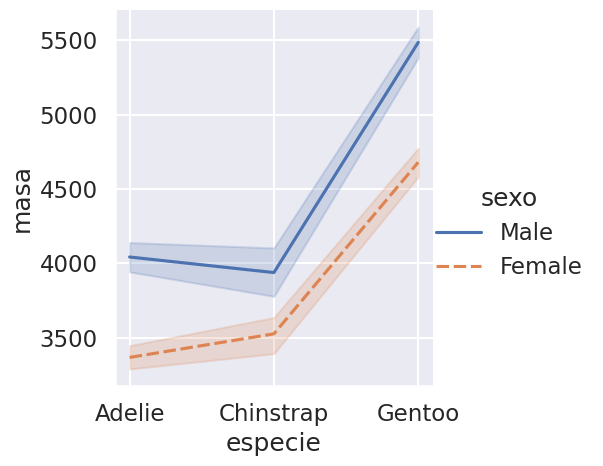

In [9]:
sns.relplot(kind="line",
            data=pinguinos,
            x="especie",
            y="masa",
            hue="sexo",
            style="sexo",
            errorbar=("ci", 99)) # intervalo de confianza de 99%, por defecto es de 95%

plt.show()

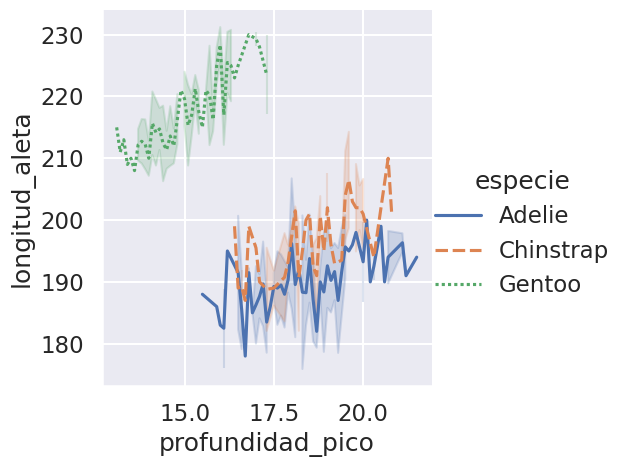

In [10]:
sns.relplot(kind="line",
            data=pinguinos,
            x="profundidad_pico",
            y="longitud_aleta",
            hue="especie",
            style="especie",
            errorbar=("sd")) # desviacion estandar

### Combinación de dispersión y línea

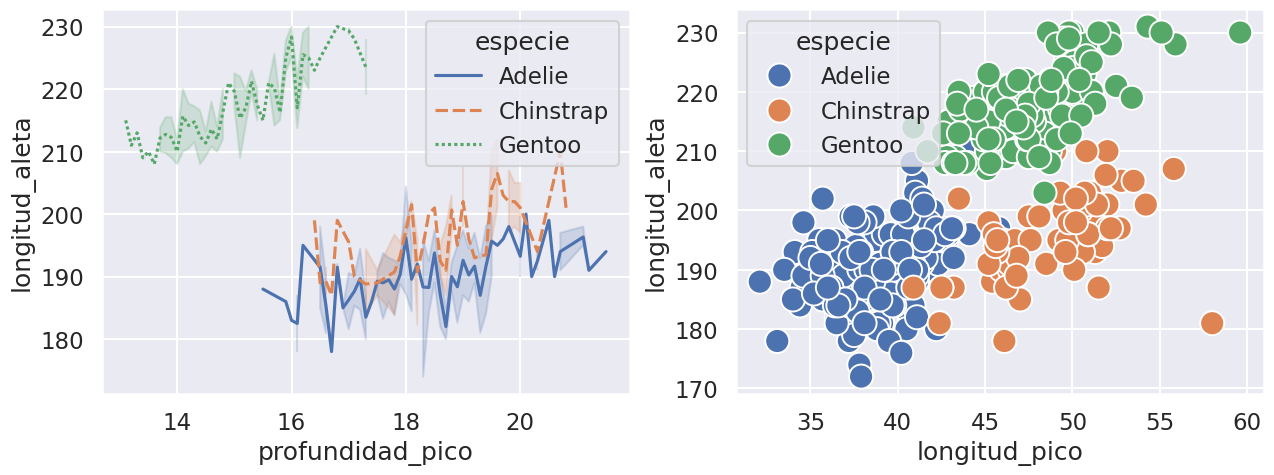

In [ ]:
# Primero hacemos las graficas en forma individual
# tenemos la figura general por un lado, y por el otro los ejes, que en matplotlib no son otra cosa que las subfiguras que la componen
figura, ejes = plt.subplots(1, # un renglon
                            2, # dos figuras por renglon
                            figsize=(15, 5)) # figura total de 15 x 5 pulgadas
sns.lineplot(data=pinguinos,
            x="profundidad_pico",
            y="longitud_aleta",
            hue="especie",
            style="especie",
            ax=ejes[0])

sns.scatterplot(data=pinguinos,
            x="longitud_pico",
            y="longitud_aleta",
            hue="especie",
            s=300,
            ax=ejes[1])



plt.show()